In [1]:
addpath(genpath('./'))
addpath(genpath('../..'))

In [2]:
addpath(genpath('../../..'))

In [3]:
clear var all_data
load_all_processed

Could not find existing all_data variable. Loading from disk...
Loading data from participant 1... FAILED.
Loading data from participant 2... Warning: The new variables being added to the table have fewer rows than the table. They have been extended with rows containing default values.
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 11)
  In load_all_processed (line 23)
gamechange
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 41)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 327)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 71)
  In load_all_processed (line 23)
soundchange
SUCCESS!
Loading data from participant 3... FAILED.
Loading data from participant 4... Warning: The new variables being added to the table have fewer rows than the tabl

  In correct_events (line 71)
  In load_all_processed (line 23)
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
soundchange
SUCCESS!
Loading data from participant 10... Warning: The new variables being added to the table

  In tabular/subsasgn (line 64)
  In correct_events (line 11)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 41)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 327)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 71)
  In load_all_processed (line 23)
soundchange
soundchange
soundchange
soundchange
SUCCESS!
Loading data from participant 21... SUCCESS!
Loading data from participant 22... Warning: The new variables being added to the table have fewer rows than the table. They have been extended with rows containing default values.
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn (line 64)
  In correct_events (line 11)
  In load_all_processed (line 23)
> In tabular/subsasgnParens (line 280)
  In tabular/subsasgnBraces (line 154)
  In tabular/subsasgn

In [4]:
event_fsr_to_feeltrace_slope % prepare training data and save as csv

In [5]:
uniq_labels = unique(result.label);
uniq_scenes = unique(result.scene);
uniq_types = unique(result.type);

label_key = 1:length(uniq_labels);
scene_key = 1:length(uniq_scenes);
type_key = 1:length(uniq_types);

label_ind_map = containers.Map(uniq_labels, label_key);
scene_ind_map = containers.Map(uniq_scenes, scene_key);
type_ind_map = containers.Map(uniq_types, type_key);

% convert result into matrix form
data = result(:,:);
data.label = cellfun(@(x) label_ind_map(x), result.label);
data.scene = cellfun(@(x) scene_ind_map(x), result.scene);
data.type = cellfun(@(x) type_ind_map(x), result.type);

In [80]:
% make sure current dir is EEGTouch/matlab/classification/wrap_Matlab (can check by running dir)
mexAll % import and compile catch22 (feature extraction tool for time series)

Compiling DN_HistogramMode_5...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling DN_HistogramMode_10...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling CO_f1ecac...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling CO_FirstMin_ac...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling CO_HistogramAMI_even_2_5...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling CO_trev_1_num...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling MD_hrv_classic_pnn40...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling SB_BinaryStats_mean_longstretch1...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling SB_TransitionMatrix_3ac_sumdiagcov...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling PD_PeriodicityWang_th0_01...
Building with 'Xcode with Clang'.
MEX completed successfully.

Compiling CO_Embed2_Di

### some characteristics of data

z-score distribution of feeltrace slope

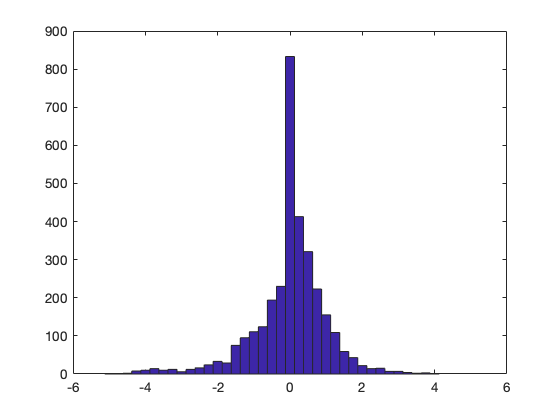

In [223]:
hist(result.slope_bin, -5:0.25:4)

Percentage of feeltrace slope samples included between -sd/4 sd and sd/4

In [222]:
sum(result.slope_bin > -0.25 & result.slope_bin < 0.25) / length(result.slope_bin)


ans =

    0.3561



In [236]:
sd = std(result{:, {'feeltrace_slope'}})
m = mean(result{:, {'feeltrace_slope'}})


sd =

    0.0078


m =

   1.3301e-04



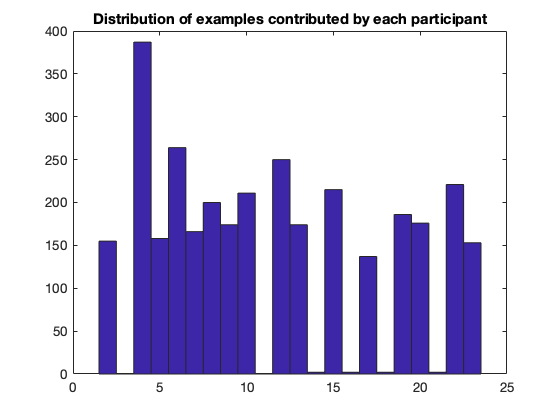

In [365]:
hist(result.pnum, 2:1:23)
title('Distribution of examples contributed by each participant')

In [20]:
head(data, 1)


ans =

  1x116 table

    timestamp_ms    label    pnum    type    scene    key_hold    key_left    key_down    key_right    key_jump    feeltrace    feeltrace_slope    feeltrace_calibrated    feeltrace_10    slope_zscore    slope_bin    slope_tri    A0_DN_HistogramMode_5    A0_DN_HistogramMode_10    A0_CO_f1ecac    A0_CO_FirstMin_ac    A0_CO_HistogramAMI_even_2_5    A0_CO_trev_1_num    A0_MD_hrv_classic_pnn40    A0_SB_BinaryStats_mean_longstretch1    A0_SB_TransitionMatrix_3ac_sumdiagcov    A0_PD_PeriodicityWang_th0_01    A0_CO_Embed2_Dist_tau_d_expfit_meandiff    A0_IN_AutoMutualInfoStats_40_gaussian_fmmi    A0_FC_LocalSimple_mean1_tauresrat    A0_DN_OutlierInclude_p_001_mdrmd    A0_DN_OutlierInclude_n_001_mdrmd    A0_SP_Summaries_welch_rect_area_5_1    A0_SB_BinaryStats_diff_longstretch0    A0_SB_MotifThree_quantile_hh    A0_SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1    A0_SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1    A0_SP_Summaries_welch_rect_centroid    A0_FC_LocalSimple_mean3_stde

       56900         66       2       1       12       2.9282      485.19     0.74096      748.44         0           79           0.0023443             -2.0657             -2.5822          0.2831         true           1               0.23204                  -0.3294                 11                23                      0.19187                 0.00015027                0.145                             35                                    0.17973                               140                                 0.65643                                        16                                       0.5                               -0.11496                            0.021659                              0.99965                                  26                               0.55256                                  0.34694                                         0.32653                                  0.095107                             0.24215                       0.98662   

## Classification

In [48]:
%%file fit_random_forest_tuning.m
function [Mdl, err, params, best] = fit_random_forest_tuning(X, y, categorical_predictors, minleaves, maxNumSplits, numTrees)
    Mdl = cell(numel(maxNumSplits),numel(minleaves));
    
    for k = 1:numel(minleaves);
        for j = 1:numel(maxNumSplits);
            fprintf('fitting random forest for %d min leaves and %d max splits... \n', minleaves(k), maxNumSplits(j))
            t = templateTree('MaxNumSplits',maxNumSplits(j), 'minleaf', minleaves(k), 'Surrogate','on');
            Mdl{j,k} = fitensemble(X,y,'bag',numTrees,t,'CategoricalPredictors', categorical_predictors,'Type','classification','KFold', 5);
        end;
    end;
    
    kflAll = @(x)kfoldLoss(x,'Mode','cumulative');
    errorCell = cellfun(kflAll,Mdl,'Uniform',false);
    err = reshape(cell2mat(errorCell),[numTrees numel(maxNumSplits) numel(minleaves)]);
    
    [minErr,minErrIdxLin] = min(err(:));
    [idxNumTrees,idxMNS,idxMinLeaf] = ind2sub(size(err),minErrIdxLin);
    params = struct('num_tree', idxNumTrees, ...
                    'max_num_splits', maxNumSplits(idxMNS), ...
                    'min_leaves', minleaves(idxMinLeaf))

    best = Mdl(idxMNS, idxMinLeaf);
    best = best{1};
    ypred = kfoldPredict(best);
    [C, order] = confusionmat(best.Y,ypred);
    h = heatmap(int8(order), int8(order), C/sum(sum(C)));
    caxis([0, 0.6])
    h.Title = sprintf('Overall accuracy %0.2f', trace(C/sum(sum(C))));
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/fit_random_forest_tuning.m'.


In [92]:
%%file fit_logistic_reg_tuning.m
function [Mdl, err, params, best] = fit_logistic_reg_tuning(X, y, categorical_predictors, lambdas)
    X(isnan(X)) = 0;
    for i = 1:numel(categorical_predictors)
        X = [X dummyvar(X(:, categorical_predictors(i)))];
    end
    X(:, categorical_predictors) = [];
    
    Mdl = cell(numel(lambdas));
    for j = 1:numel(lambdas);
        fprintf('fitting logistic_regression for lambda = %d \n', lambdas(j))
        t = templateLinear('Learner', 'logistic', 'Regularization', 'lasso', 'Lambda', lambdas(j));
%         t = templateSVM('Standardize',true,'KernelFunction','gaussian')
        Mdl{j} = fitcecoc(X, y, 'Learners', t, 'KFold', 5);
    end;
    
    kflAll = @(x)kfoldLoss(x);
    errorCell = cellfun(kflAll,Mdl,'Uniform',false);
    err = cell2mat(errorCell);
    
    [minErr,minErrIdxLin] = min(err(:));
    params = struct('lambda', lambdas(minErrIdxLin))

    best = Mdl(minErrIdxLin);
    best = best{1};
    ypred = kfoldPredict(best);
    [C, order] = confusionmat(best.Y,ypred);
    h = heatmap(int8(order), int8(order), C/sum(sum(C)));
    caxis([0, 0.6])
    h.Title = sprintf('Overall accuracy %0.2f', trace(C/sum(sum(C))));
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/fit_logistic_reg_tuning.m'.


Error using eval
Undefined function or variable 'X'.



### [Event, fsr] to [sign of feeltrace slope]

features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**

labels:
- **<span style="color:blue;">sign of feeltrace slope (binary classification)</span>**

#### Data preparation

In [8]:
X1 = data{:, 1:10};
y1 = data{:, 16};
categorical_predictors = [2 3 4 5];

fitting random forest for 1 min leaves and 1 max splits... 

params = 

  struct with fields:

          num_tree: 33
    max_num_splits: 1
        min_leaves: 1



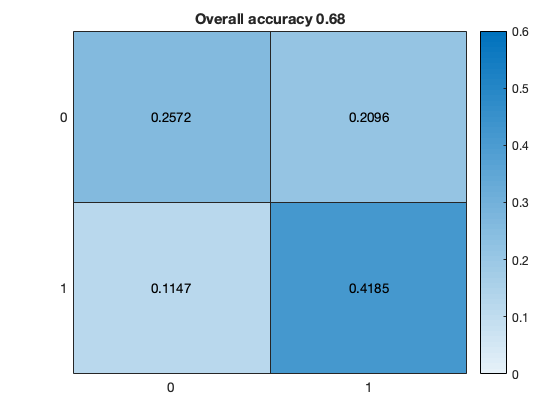

In [19]:
n = size(X1,1);
m = floor(log2(n - 1));
maxNumSplits1 = 2.^(0:m);
minleaves1 = [1 10 50];
numTrees1 = 150;
[Mdl1, error1, params1, best1] = fit_random_forest_tuning(X1, y1, categorical_predictors, minleaves1, maxNumSplits1, numTrees1);

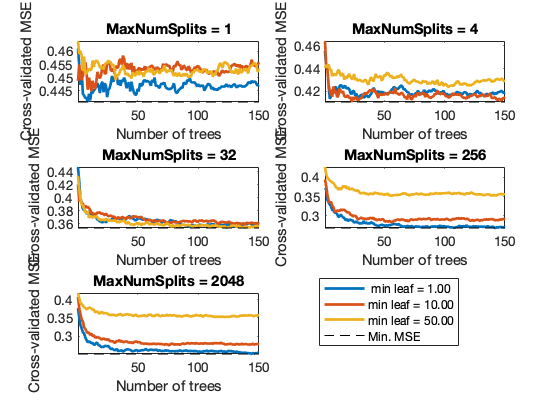

In [301]:
mnsPlot = [1 round(numel(maxNumSplits1)/4) round(numel(maxNumSplits1)/2) round(numel(maxNumSplits1)*3/4) numel(maxNumSplits1)];
figure;
for k = 1:5;
    subplot(3,2,k);
    plot(squeeze(error1(:,mnsPlot(k),:)),'LineWidth',2);
    axis tight;
    hold on;
    h = gca;
    plot(h.XLim,min(min(error1(:,mnsPlot(k),:))).*[1 1],'--k');
%     h.YLim = [.2 .5];    
    xlabel 'Number of trees';
    ylabel 'Cross-validated MSE';
    title(sprintf('MaxNumSplits = %d', maxNumSplits1(mnsPlot(k))));
    hold off;
end;
hL = legend([cellstr(num2str(minleaves1','min leaf = %0.2f'));'Min. MSE']);
hL.Position(1) = 0.6;

### [Event, fsr, feeltrace value] to [sign of feeltrace slope]
features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**
- **<span style="color:blue;">feeltrace (snapshot): average across 6s around event timestamp</span>**

labels:
- **<span style="color:blue;">sign of feeltrace slope (binary classification)</span>**

In [370]:
X2 = data{:, 1:11};
y2 = data{:, 16};
categorical_predictors = [2 3 4 5];

#### Random forest

In [371]:
n = size(X2,1);
m = floor(log2(n - 1));
maxNumSplits = 2.^(0:m);
minleaves = [1 10 50];
numTrees = 150;
[Mdl2, error2, params2, best2] = fit_random_forest_tuning(X2, y2, categorical_predictors, minleaves, maxNumSplits, numTrees);

fitting random forest for 1 min leaves and 1 max splits... 
fitting random forest for 1 min leaves and 2 max splits... 
fitting random forest for 1 min leaves and 4 max splits... 
fitting random forest for 1 min leaves and 8 max splits... 
fitting random forest for 1 min leaves and 16 max splits... 
fitting random forest for 1 min leaves and 32 max splits... 
fitting random forest for 1 min leaves and 64 max splits... 
fitting random forest for 1 min leaves and 128 max splits... 
fitting random forest for 1 min leaves and 256 max splits... 
fitting random forest for 1 min leaves and 512 max splits... 
fitting random forest for 1 min leaves and 1024 max splits... 
fitting random forest for 1 min leaves and 2048 max splits... 
fitting random forest for 10 min leaves and 1 max splits... 
fitting random forest for 10 min leaves and 2 max splits... 
fitting random forest for 10 min leaves and 4 max splits... 
fitting random forest for 10 min leaves and 8 max splits... 
fitting random forest

#### Logistic regression

### [Event, fsr, feeltrace value] to [feeltrace slope categories {-1, 0, 1}]
features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**
- **<span style="color:blue;">feeltrace (snapshot): average across 6s around event timestamp</span>**

labels:

- **<span style="color:blue;">feeltrace slope (three class classification)</span>**
    - 0: $\pm sd/4$ away from mean (mean is very close to zero)
    - -1: $\lt -sd/4$
    - 1: $\gt sd/4$ 

In [9]:
X3 = data{:, 1:11};
y3 = data{:, 17};
categorical_predictors = [2 3 4 5];

#### Random forest

In [10]:
n = size(X3,1);
m = floor(log2(n - 1));
maxNumSplits = 2.^(0:m);
minleaves = [1 10 50];
numTrees = 150;
[Mdl3, error3, params3, best3] = fit_random_forest_tuning(X3, y3, categorical_predictors, minleaves, maxNumSplits, numTrees);

fitting random forest for 1 min leaves and 1 max splits... 
fitting random forest for 1 min leaves and 2 max splits... 
fitting random forest for 1 min leaves and 4 max splits... 
fitting random forest for 1 min leaves and 8 max splits... 
fitting random forest for 1 min leaves and 16 max splits... 
fitting random forest for 1 min leaves and 32 max splits... 
fitting random forest for 1 min leaves and 64 max splits... 
fitting random forest for 1 min leaves and 128 max splits... 
fitting random forest for 1 min leaves and 256 max splits... 
fitting random forest for 1 min leaves and 512 max splits... 
fitting random forest for 1 min leaves and 1024 max splits... 
fitting random forest for 1 min leaves and 2048 max splits... 
fitting random forest for 10 min leaves and 1 max splits... 
fitting random forest for 10 min leaves and 2 max splits... 
fitting random forest for 10 min leaves and 4 max splits... 
fitting random forest for 10 min leaves and 8 max splits... 
fitting random forest

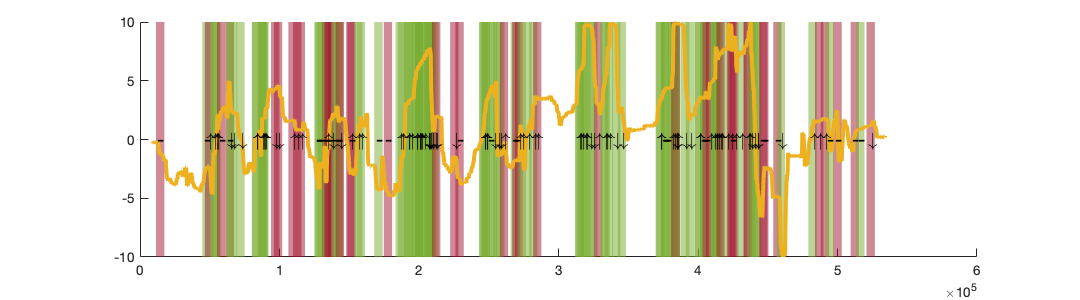

In [148]:
%%plot inline -w 1080 -h 300
p2 = all_data{2, 1};
feeltrace2_10 = p2.joystick.joystick;
feeltrace2_10 = (feeltrace2_10 * 20 / ...
                (max(feeltrace2_10) - min(feeltrace2_10))) - 10;
p2_pred = best3.X(:, 3) == 2;
p2_pred_time = best3.X(p2_pred, 1);
p2_pred_val = ypred3(p2_pred);
p2_pred_true = best3.Y(p2_pred);
p2_pred_up = p2_pred_time(p2_pred_val == 1);
p2_pred_down = p2_pred_time(p2_pred_val == -1);
p2_pred_0 = p2_pred_time(p2_pred_val == 0);

y = [-10 10 10 -10];
figure;
% subplot(2,1,1);
hold on;
for i = 1:length(p2_pred_time)
    t = p2_pred_time(i);
    x = [t-1000 t-1000 t+5000 t+5000];
    if p2_pred_val(i) == p2_pred_true(i)
        patch(x, y, [0.4660 0.6740 0.1880], 'FaceAlpha',0.5, 'EdgeColor','none')
    else
        patch(x, y, [0.6350 0.0780 0.1840], 'FaceAlpha',0.5, 'EdgeColor','none')
    end
end
% for i =1:length(p2_pred_up)
%     t = p2_pred_up(i);
%     x = [t-1000 t-1000 t+5000 t+5000];
%     patch(x, y, [0.4660 0.6740 0.1880], 'FaceAlpha',0.5, 'EdgeColor','none')
% end
% for i =1:length(p2_pred_down)
%     t = p2_pred_down(i);
%     x = [t-1000 t-1000 t+5000 t+5000];
%     patch(x, y, [0.6350 0.0780 0.1840], 'FaceAlpha',0.5, 'EdgeColor','none')
% end
% for i =1:length(p2_pred_0)
%     t = p2_pred_0(i);
%     x = [t-1000 t-1000 t+5000 t+5000];
%     patch(x, y, 'blue','FaceAlpha',0.1, 'EdgeColor','none')
% end
% plot(p2.joystick.timestamp_ms, feeltrace2_10, 'Color', [0.9290 0.6940 0.1250], 'LineWidth', 3)
% subplot(2,1,2)
hold on;
% scatter(p2_pred_up, zeros(1, length(p2_pred_up)), 80, 'filled', '^')
% scatter(p2_pred_down, zeros(1, length(p2_pred_down)), 80, 'filled', 'v')
% scatter(p2_pred_0, zeros(1, length(p2_pred_0)), 80, 'x')
plot(p2.joystick.timestamp_ms, feeltrace2_10, 'Color', [0.9290 0.6940 0.1250], 'LineWidth', 3)
text(p2_pred_up, zeros(1, length(p2_pred_up)), '\uparrow', 'FontSize', 14)
text(p2_pred_down, zeros(1, length(p2_pred_down)), '\downarrow', 'FontSize', 14)
text(p2_pred_0, zeros(1, length(p2_pred_0)), '-', 'FontSize', 14)
hold off;

### [Event, fsr] to [feeltrace value categories {-1, 0, 1}]
features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**

labels:

- **<span style="color:blue;">feeltrace value (three class classification)</span>**
    - -1: [-10 -10/3)
    - 0: [-10/3 10/3)
    - 1: [10/3 10]

In [41]:
X5 = data{:, 1:10};
y5 = data{:, 14};
y_temp = int8(y5 > 10/3);
y5 = y_temp - int8(y5 < -10/3);
categorical_predictors = [2 3 4 5];

#### Random forest

In [45]:
n = size(X5,1);
m = floor(log2(n - 1));
maxNumSplits = 2.^(0:m);
minleaves = [1 10 50];
numTrees = 150;
[Mdl5, error5, params5, best5] = fit_random_forest_tuning(X5, y5, categorical_predictors, minleaves, maxNumSplits, numTrees);

fitting random forest for 1 min leaves and 1 max splits... 
fitting random forest for 1 min leaves and 2 max splits... 
fitting random forest for 1 min leaves and 4 max splits... 
fitting random forest for 1 min leaves and 8 max splits... 
fitting random forest for 1 min leaves and 16 max splits... 
fitting random forest for 1 min leaves and 32 max splits... 
fitting random forest for 1 min leaves and 64 max splits... 
fitting random forest for 1 min leaves and 128 max splits... 
fitting random forest for 1 min leaves and 256 max splits... 
fitting random forest for 1 min leaves and 512 max splits... 
fitting random forest for 1 min leaves and 1024 max splits... 
fitting random forest for 1 min leaves and 2048 max splits... 
fitting random forest for 10 min leaves and 1 max splits... 
fitting random forest for 10 min leaves and 2 max splits... 
fitting random forest for 10 min leaves and 4 max splits... 
fitting random forest for 10 min leaves and 8 max splits... 
fitting random forest

### [Event, fsr] to [feeltrace slope categories {-1, 0, 1}]
features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (time series): catch 22 features</span>**

labels:

- **<span style="color:blue;">feeltrace slope (three class classification)</span>**
    - 0: $\pm sd/4$ away from mean (mean is very close to zero)
    - -1: $\lt -sd/4$
    - 1: $\gt sd/4$ 

In [23]:
X7 = [data{:, 1:11} data{:, 18:end}];
y7 = data{:, 17};
categorical_predictors = [2 3 4 5];

In [95]:
lambdas = [0.01 0.1 1]
[Mdl7, error7, params7, best7] = fit_logistic_reg_tuning(X7, y7, categorical_predictors, lambdas);


lambdas =

    0.0100    0.1000    1.0000

fitting logistic_regression for lambda = 1.000000e-02 
fitting logistic_regression for lambda = 1.000000e-01 
fitting logistic_regression for lambda = 1 


Undefined function 'kfoldLoss' for input arguments of type 'double'.

Error in fit_logistic_reg_tuning>@(x)kfoldLoss(x)

Error in fit_logistic_reg_tuning (line 17)
    errorCell = cellfun(kflAll,Mdl,'Uniform',false);



fitting logistic_regression for lambda = 1.000000e-01 
|====================================================================================================================|
| Iter | Eval   | Objective   | Objective   | BestSoFar   | BestSoFar   |       Coding |       Lambda |      Learner |
|      | result |             | runtime     | (observed)  | (estim.)    |              |              |              |
|====================================================================================================================|
|    1 | Best   |     0.64235 |     0.31486 |     0.64235 |     0.64235 |     onevsone |   6.7873e-09 |     logistic |
|    2 | Best   |      0.6136 |     0.32112 |      0.6136 |     0.62745 |     onevsall |   2.2314e-06 |          svm |
|    3 | Best   |     0.60866 |     0.32823 |     0.60866 |     0.61067 |     onevsall |      0.20137 |          svm |
|    4 | Accept |     0.64235 |     0.36027 |     0.60866 |     0.61132 |     onevsone |      0.51079 |     logi

Undefined function 'kfoldLoss' for input arguments of type 'classreg.learning.classif.CompactClassificationECOC'.

Error in @(x)kfoldLoss(x)



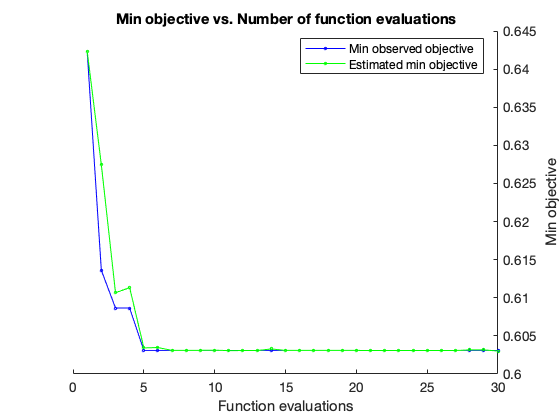

In [138]:
X = data{:, 1:10};
y = data{:, 17};
categorical_predictors = [];
lambdas = [0.1];


X(isnan(X)) = 0;
for i = 1:numel(categorical_predictors)
    X = [X dummyvar(X(:, categorical_predictors(i)))];
end
X(:, categorical_predictors) = [];

Mdl = cell(numel(lambdas), 1);
for j = 1:numel(lambdas);
    fprintf('fitting logistic_regression for lambda = %d \n', lambdas(j))
%     t = templateLinear('Learner', 'logistic', 'Regularization', 'lasso', 'Lambda', lambdas(j));
%     t = templateSVM('Standardize',true,'KernelFunction','gaussian');
%     Mdl{j} = fitcecoc(X, y, 'Learners', t, 'KFold', 5);
    Mdl{j} = fitcecoc(X, y, 'Learners', 'linear', 'OptimizeHyperparameters','auto');
end;

kflAll = @(x)kfoldLoss(x);
errorCell = cellfun(kflAll,Mdl,'Uniform',false);
err = cell2mat(errorCell);

[minErr,minErrIdxLin] = min(err(:));
params = struct('lambda', lambdas(minErrIdxLin))

best = Mdl(minErrIdxLin);
best = best{1};
ypred = kfoldPredict(best);
[C, order] = confusionmat(best.Y,ypred);
h = heatmap(int8(order), int8(order), C/sum(sum(C)));
caxis([0, 0.6])
h.Title = sprintf('Overall accuracy %0.2f', trace(C/sum(sum(C))));

fitting logistic_regression for lambda = 1.000000e-01 
|====================================================================================================================|
| Iter | Eval   | Objective   | Objective   | BestSoFar   | BestSoFar   |       Coding |       Lambda |      Learner |
|      | result |             | runtime     | (observed)  | (estim.)    |              |              |              |
|====================================================================================================================|
|    1 | Best   |    0.033333 |     0.42557 |    0.033333 |    0.033333 |     onevsall |   8.2037e-05 |          svm |
|    2 | Accept |        0.04 |     0.30787 |    0.033333 |    0.036547 |     onevsone |     0.057202 |     logistic |
|    3 | Accept |    0.033333 |     0.27685 |    0.033333 |    0.033337 |     onevsone |   3.2762e-06 |          svm |
|    4 | Accept |     0.33333 |     0.28245 |    0.033333 |    0.033868 |     onevsall |        662.9 |         

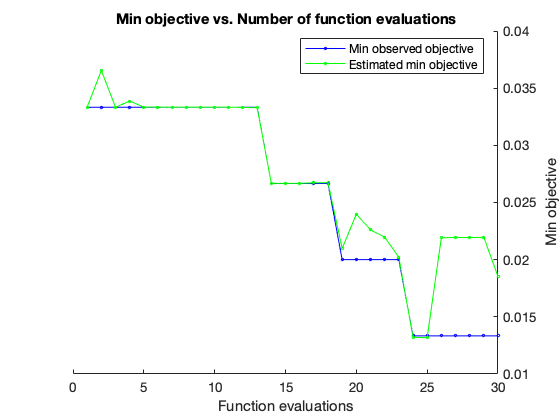

In [140]:
load fisheriris
X = meas;
Y = species;
lambdas = [0.1];

Mdl = cell(numel(lambdas), 1);
for j = 1:numel(lambdas);
    fprintf('fitting logistic_regression for lambda = %d \n', lambdas(j))
%     t = templateLinear('Learner', 'logistic', 'Regularization', 'lasso', 'Lambda', lambdas(j));
%     t = templateSVM('Standardize',true,'KernelFunction','gaussian');
%     Mdl{j} = fitcecoc(X, y, 'Learners', t, 'KFold', 5);
    Mdl{j} = fitcecoc(X, Y, 'Learners', 'linear', 'OptimizeHyperparameters','auto');
end;

### [fsr] to [feeltrace slope categories {-1, 0, 1}]
features:
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**

labels:

- **<span style="color:blue;">feeltrace slope (three class classification)</span>**
    - 0: $\pm sd/4$ away from mean (mean is very close to zero)
    - -1: $\lt -sd/4$
    - 1: $\gt sd/4$ 

#### Data preparation

In [178]:
%%file extract_joystick.m

function [abs, variance, slp, slp2] = extract_joystick(timeseries, timestamps, low_off, high_off) 
    abs = zeros(height(timestamps), 1);
    variance = zeros(height(timestamps), 1);
    slp = zeros(height(timestamps), 1);
    slp2 = zeros(height(timestamps), 1);

    for j = 1:height(timestamps)
        ts = timestamps{j,1};
        rows = timeseries.timestamp_ms <= ts + high_off & ...
            timeseries.timestamp_ms >= ts - low_off;
        joystick_in_window = timeseries(rows, {'timestamp_ms', 'joystick'});
        if size(joystick_in_window, 1) > 0
            abs(j,1) = max(joystick_in_window.joystick);
            variance(j,1) = var(joystick_in_window.joystick);
            
            % Calculate average slope in window
            slp(j,1) = (joystick_in_window.joystick(end) - joystick_in_window.joystick(1)) ...
                / (joystick_in_window.timestamp_ms(end) - joystick_in_window.timestamp_ms(1));
            
            % Calculate individual slopes in window and average
            slopes = diff(joystick_in_window.joystick)./diff(joystick_in_window.timestamp_ms);
            slp2(j,1) = mean(slopes);
        else 
            abs(j,1) = NaN;
            variance(j,1) = NaN;
            slp(j,1) = NaN;
            slp2(j,1) = NaN;
        end 
    end 
    return;
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/extract_joystick.m'.


In [220]:
%%file categorize_val.m
function [b] = categorize_val(z)
    if abs(z) < 0.25
        b = 0;
    elseif z >= 0.25
        b = 1;
    else
        b = -1;
    end
    return
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/categorize_val.m'.


In [6]:
data_dense = [];
for i = 1:size(all_data,1)
    pfile = all_data{i,1};
    if ~isempty(pfile)
        fprintf('Extracting fsr {x} joystick data from participant %d...\n', i);
        fs = 0.5;
        start = idivide(min(pfile.joystick.timestamp_ms), int32(fs*1000), 'ceil') * fs*1000;
        new_timestamp_ms = double(start):fs*1000:pfile.fsr.timestamp_ms(length(pfile.fsr.timestamp_ms));
%         fsr_A0 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A0, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A1 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A1, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A2 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A2, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A3 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A3, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A4 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A4, new_timestamp_ms), 0.4*fs, fs));
        fsr_A0 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A0, new_timestamp_ms));
        fsr_A1 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A1, new_timestamp_ms));
        fsr_A2 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A2, new_timestamp_ms));
        fsr_A3 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A3, new_timestamp_ms));
        fsr_A4 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A4, new_timestamp_ms));

        new_timestamp_ms = transpose(new_timestamp_ms);
        [w1abs, w1var, w1slp, w1slp2] = ...
                    extract_joystick(pfile.joystick, array2table(new_timestamp_ms), 1000, 5000);     
        data_dense = [data_dense; new_timestamp_ms fsr_A0 fsr_A1 fsr_A2 fsr_A3 fsr_A4 w1abs w1slp];
    end
end
data_dense(isnan(data_dense(:, 8)), 8) = 0;
data_dense = [data_dense arrayfun(@categorize_val, zscore(data_dense(:, 8)))];

Extracting fsr {x} joystick data from participant 2...
Extracting fsr {x} joystick data from participant 4...
Extracting fsr {x} joystick data from participant 5...
Extracting fsr {x} joystick data from participant 6...
Extracting fsr {x} joystick data from participant 7...
Extracting fsr {x} joystick data from participant 8...
Extracting fsr {x} joystick data from participant 9...
Extracting fsr {x} joystick data from participant 10...
Extracting fsr {x} joystick data from participant 12...
Extracting fsr {x} joystick data from participant 13...
Extracting fsr {x} joystick data from participant 14...
Extracting fsr {x} joystick data from participant 15...
Extracting fsr {x} joystick data from participant 16...
Extracting fsr {x} joystick data from participant 17...
Extracting fsr {x} joystick data from participant 18...
Extracting fsr {x} joystick data from participant 19...
Extracting fsr {x} joystick data from participant 20...
Extracting fsr {x} joystick data from participant 21...

In [7]:
X6 = data_dense(:, 2:7);
y6 = data_dense(:, 9);
categorical_predictors = [];

In [18]:
n = size(X6,1);
m = floor(log2(n - 1));
maxNumSplits = 2.^(0:m-4);
minleaves = [1 10];
numTrees = 150;
[Mdl6, error6, params6, best6] = fit_random_forest_tuning(X6, y6, categorical_predictors, minleaves, maxNumSplits, numTrees);

fitting random forest for 1 min leaves and 1 max splits... 
fitting random forest for 1 min leaves and 2 max splits... 
fitting random forest for 1 min leaves and 4 max splits... 
fitting random forest for 1 min leaves and 8 max splits... 
fitting random forest for 1 min leaves and 16 max splits... 
fitting random forest for 1 min leaves and 32 max splits... 
fitting random forest for 1 min leaves and 64 max splits... 
fitting random forest for 1 min leaves and 128 max splits... 
fitting random forest for 1 min leaves and 256 max splits... 
fitting random forest for 1 min leaves and 512 max splits... 
fitting random forest for 1 min leaves and 1024 max splits... 
fitting random forest for 1 min leaves and 2048 max splits... 
fitting random forest for 10 min leaves and 1 max splits... 
fitting random forest for 10 min leaves and 2 max splits... 
fitting random forest for 10 min leaves and 4 max splits... 
fitting random forest for 10 min leaves and 8 max splits... 
fitting random forest

## Regression

### [Event, fsr, feeltrace value] to [feeltrace slope]
features:
- timestamp 
- event label: coded to int, accessible through `label_ind_map`
- pnum
- event type: coded to int, accessible through `type_ind_map`
- scene: coded to int, accessible through `scene_ind_map`
- **<span style="color:blue;">5 fsr streams (snapshot): average across 6s around event timestamp</span>**
- **<span style="color:blue;">feeltrace (snapshot): average across 6s around event timestamp</span>**

labels:

- **<span style="color:blue;">feeltrace slope z-score</span>**

In [19]:
X4 = data{:, 1:11};
y4 = data{:, 14};
categorical_predictors = [2 3 4 5];

#### hyper param tuning
skip to next part for the best hyper param

In [21]:
MdlDeep4 = fitrtree(X4,y4,'CrossVal','on','MergeLeaves','off','CategoricalPredictors', categorical_predictors,...
    'MinParentSize',1,'Surrogate','on');
MdlStump4 = fitrtree(X4,y4,'MaxNumSplits',1,'CategoricalPredictors', categorical_predictors,'CrossVal','on','Surrogate','on');

In [22]:
n = size(X4,1);
m = floor(log2(n - 1));
lr = [0.1 0.25 0.5 1];
maxNumSplits = 2.^(0:m);
numTrees = 150;
Mdl4 = cell(numel(maxNumSplits),numel(lr));
for k = 1:numel(lr);
    for j = 1:numel(maxNumSplits);
        fprintf('fitting bagged regression tree with %0.2g learn rate and %d max splits... \n', lr(k), maxNumSplits(j))
        t = templateTree('MaxNumSplits',maxNumSplits(j),'Surrogate','on');
        Mdl4{j,k} = fitensemble(X4,y4,'LSBoost',numTrees,t,...
            'CategoricalPredictors', categorical_predictors,'Type','regression','KFold',5,'LearnRate',lr(k));
    end;
end;

fitting bagged regression tree with 0.1 learn rate and 1 max splits... 
fitting bagged regression tree with 0.1 learn rate and 2 max splits... 
fitting bagged regression tree with 0.1 learn rate and 4 max splits... 
fitting bagged regression tree with 0.1 learn rate and 8 max splits... 
fitting bagged regression tree with 0.1 learn rate and 16 max splits... 
fitting bagged regression tree with 0.1 learn rate and 32 max splits... 
fitting bagged regression tree with 0.1 learn rate and 64 max splits... 
fitting bagged regression tree with 0.1 learn rate and 128 max splits... 
fitting bagged regression tree with 0.1 learn rate and 256 max splits... 
fitting bagged regression tree with 0.1 learn rate and 512 max splits... 
fitting bagged regression tree with 0.1 learn rate and 1024 max splits... 
fitting bagged regression tree with 0.1 learn rate and 2048 max splits... 
fitting bagged regression tree with 0.25 learn rate and 1 max splits... 
fitting bagged regression tree with 0.25 learn r

In [23]:
kflAll = @(x)kfoldLoss(x,'Mode','cumulative');
errorCell = cellfun(kflAll,Mdl4,'Uniform',false);
error4 = reshape(cell2mat(errorCell),[numTrees numel(maxNumSplits) numel(lr)]);
errorDeep4 = kfoldLoss(MdlDeep4);
errorStump4 = kfoldLoss(MdlStump4);

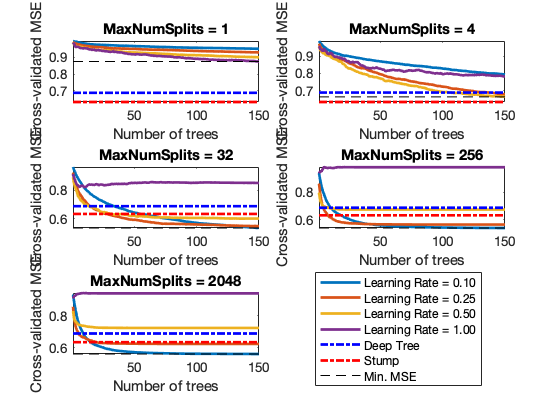

In [391]:
mnsPlot = [1 round(numel(maxNumSplits)/4) round(numel(maxNumSplits)/2) round(numel(maxNumSplits)*3/4) numel(maxNumSplits)];
figure;
for k = 1:5;
    subplot(3,2,k);
    plot(squeeze(error4(:,mnsPlot(k),:)),'LineWidth',2);
    axis tight;
    hold on;
    h = gca;
    plot(h.XLim,[errorDeep4 errorDeep4],'-.b','LineWidth',2);
    plot(h.XLim,[errorStump4 errorStump4],'-.r','LineWidth',2);
    plot(h.XLim,min(min(error4(:,mnsPlot(k),:))).*[1 1],'--k');
%     h.YLim = [10 50];    
    xlabel 'Number of trees';
    ylabel 'Cross-validated MSE';
    title(sprintf('MaxNumSplits = %d', maxNumSplits(mnsPlot(k))));
    hold off;
end;
hL = legend([cellstr(num2str(lr','Learning Rate = %0.2f'));...
        'Deep Tree';'Stump';'Min. MSE']);
hL.Position(1) = 0.6;

In [24]:
clear r_squared
[minErr,minErrIdxLin] = min(error4(:));
[idxNumTrees,idxMNS,idxLR] = ind2sub(size(error4),minErrIdxLin);
best4 = Mdl4(idxMNS, idxLR);
best4 = best4{1};

r_squared = @(Y,Yfit,W) 1 - (sum((Y - Yfit) .^ 2) / sum((Y - mean(Y)) .^ 2));
% adjusted_r_squared = @(Y,Yfit,W) fprintf(int2str(W)); %1 - ((length(Y) - 1)/(length(Y) - length(W))) * (sum((Y - Yfit) .^ 2) / sum((Y - mean(Y)) .^ 2));

fprintf('Min. MSE = %0.5f\n', minErr)
fprintf('R^2 = %0.5f\n', kfoldLoss(best4, 'lossfun', r_squared))
% fprintf('Adjusted R^2 = %0.5f\n', kfoldLoss(best4, 'lossfun', adjusted_r_squared))

Min. MSE = 0.63762
R^2 = 0.49204


In [25]:
fprintf('\nOptimal Parameter Values:\nNum. Trees = %d',idxNumTrees);



Optimal Parameter Values:
Num. Trees = 150

In [26]:
fprintf('\nMaxNumSplits = %d\nLearning Rate = %0.2f\n',...
    maxNumSplits(idxMNS),lr(idxLR))


MaxNumSplits = 128
Learning Rate = 0.10


Error using eval
Undefined function or variable 'errorDeep'.



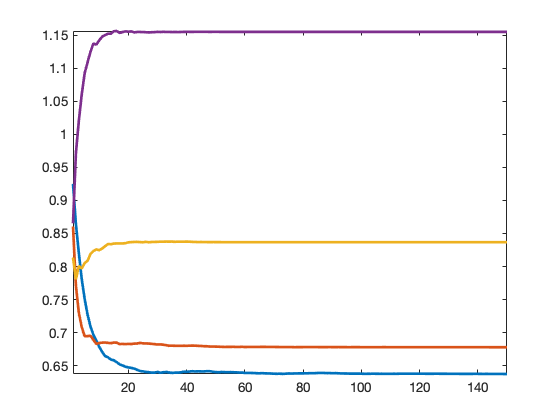

In [28]:
plot(squeeze(error4(:,idxMNS,:)),'LineWidth',2);
axis tight;
hold on;
h = gca;
plot(h.XLim,[errorDeep errorDeep],'-.b','LineWidth',2);
plot(h.XLim,[errorStump errorStump],'-.r','LineWidth',2);
plot(h.XLim,min(min(error(:,idxMNS,:))).*[1 1],'--k');
%     h.YLim = [10 50];    
xlabel 'Number of trees';
ylabel 'Cross-validated MSE';
title(sprintf('MaxNumSplits = %d', maxNumSplits(idxMNS)));
hold off;
hL = legend([cellstr(num2str(lr','Learning Rate = %0.2f'));...
        'Deep Tree';'Stump';'Min. MSE']);

#### train only the best model found above

maxNumSplits = 64, learn rate = 0.1

In [438]:
t = templateTree('MaxNumSplits',64,'Surrogate','on');
random_reg_tree = fitensemble(X4,y4,'LSBoost',150,t,...
            'Type','regression','KFold',5,'LearnRate',0.1);

In [20]:
kfoldLoss(random_reg_tree)


ans =

   32.6113



In [22]:
before = findall(groot,'Type','figure'); % Find all figures

first_val = random_reg_tree.Trained{1};
view(first_val.Trained{1}, 'Mode', 'Graph')

after = findall(groot,'Type','figure');
h = setdiff(after,before); % Get the figure handle of the tree viewer
saveas(h,'viz-best-weak-tree.png')

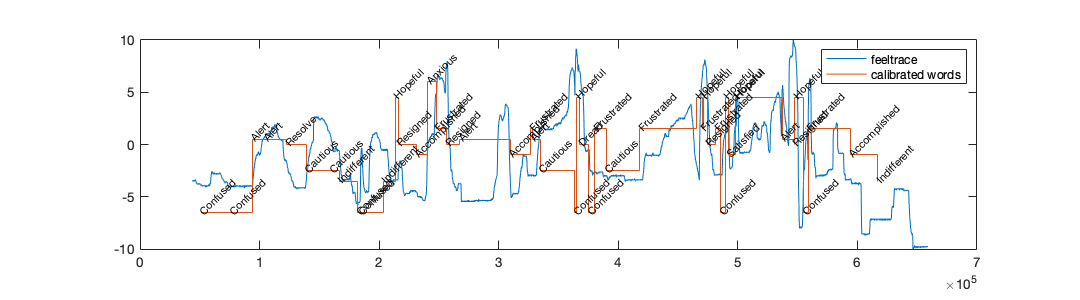

In [133]:
p2 = all_data{2, 1};
feeltrace2_10 = p2.joystick.joystick;
feeltrace2_10 = (feeltrace2_10 * 20 / ...
                (max(feeltrace2_10) - min(feeltrace2_10))) - 10;
figure;
plot(p2.joystick.timestamp_ms, feeltrace2_10)
hold on;
cali_2 = p2.calibrated_words;
stairs(cali_2.timestamp_ms, cali_2.calibrated_values)
txt = text(p2.calibrated_words.timestamp_ms, cali_2.calibrated_values, cali_2.calibrated_words, 'FontSize', 8);
set(txt, 'Rotation', 45)

pbaspect([4 1 1])
legend(["feeltrace" "calibrated words"])

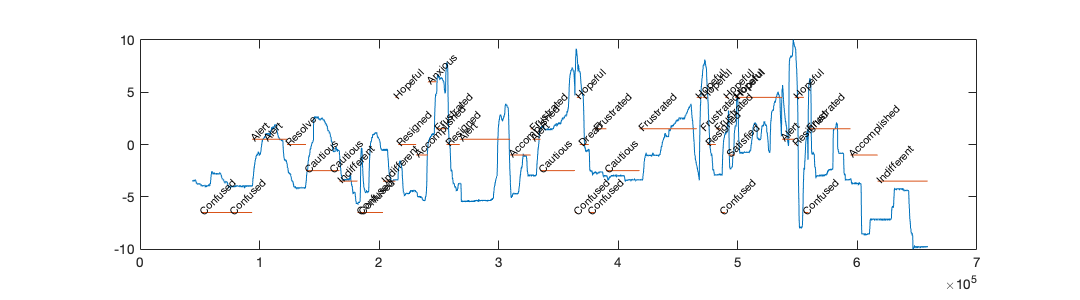

In [143]:
p2 = all_data{2, 1};
feeltrace2_10 = p2.joystick.joystick;
feeltrace2_10 = (feeltrace2_10 * 20 / ...
                (max(feeltrace2_10) - min(feeltrace2_10))) - 10;
figure;
plot(p2.joystick.timestamp_ms, feeltrace2_10)
hold on;
cali_2 = p2.calibrated_words;
for i = 1:(length(cali_2.calibrated_values)-1)
    line([cali_2.timestamp_ms(i) cali_2.timestamp_ms(i+1)], ones(2) * cali_2.calibrated_values(i))
end
line([cali_2.timestamp_ms(i+1) p2.joystick.timestamp_ms(end)], ones(2) * cali_2.calibrated_values(i+1))
% stairs(cali_2.timestamp_ms, cali_2.calibrated_values)
txt = text(p2.calibrated_words.timestamp_ms, cali_2.calibrated_values, cali_2.calibrated_words, 'FontSize', 8);
set(txt, 'Rotation', 45)

pbaspect([4 1 1])

In [138]:
all_data{4}.scalars


ans = 

  struct with fields:

           trial_number: '4'
            din_time_ms: 2577374
      eeg_start_time_ms: 2573416
             frame_rate: 30
    which_gameplay_sync: 1
             sync_frame: 252



In [178]:
%%file extract_joystick.m

function [abs, variance, slp, slp2] = extract_joystick(timeseries, timestamps, low_off, high_off) 
    abs = zeros(height(timestamps), 1);
    variance = zeros(height(timestamps), 1);
    slp = zeros(height(timestamps), 1);
    slp2 = zeros(height(timestamps), 1);

    for j = 1:height(timestamps)
        ts = timestamps{j,1};
        rows = timeseries.timestamp_ms <= ts + high_off & ...
            timeseries.timestamp_ms >= ts - low_off;
        joystick_in_window = timeseries(rows, {'timestamp_ms', 'joystick'});
        if size(joystick_in_window, 1) > 0
            abs(j,1) = max(joystick_in_window.joystick);
            variance(j,1) = var(joystick_in_window.joystick);
            
            % Calculate average slope in window
            slp(j,1) = (joystick_in_window.joystick(end) - joystick_in_window.joystick(1)) ...
                / (joystick_in_window.timestamp_ms(end) - joystick_in_window.timestamp_ms(1));
            
            % Calculate individual slopes in window and average
            slopes = diff(joystick_in_window.joystick)./diff(joystick_in_window.timestamp_ms);
            slp2(j,1) = mean(slopes);
        else 
            abs(j,1) = NaN;
            variance(j,1) = NaN;
            slp(j,1) = NaN;
            slp2(j,1) = NaN;
        end 
    end 
    return;
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/extract_joystick.m'.


In [220]:
%%file categorize_val.m
function [b] = categorize_val(z)
    if abs(z) < 0.25
        b = 0;
    elseif z >= 0.25
        b = 1;
    else
        b = -1;
    end
    return
end

Created file '/Users/Qianqian/FQQ/College/Work/SPIN/EEG/EEGTouch/matlab/classification/categorize_val.m'.


In [6]:
data_dense = [];
for i = 1:size(all_data,1)
    pfile = all_data{i,1};
    if ~isempty(pfile)
        fprintf('Extracting fsr {x} joystick data from participant %d...\n', i);
        fs = 0.5;
        start = idivide(min(pfile.joystick.timestamp_ms), int32(fs*1000), 'ceil') * fs*1000;
        new_timestamp_ms = double(start):fs*1000:pfile.fsr.timestamp_ms(length(pfile.fsr.timestamp_ms));
%         fsr_A0 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A0, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A1 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A1, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A2 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A2, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A3 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A3, new_timestamp_ms), 0.4*fs, fs));
%         fsr_A4 = transpose(lowpass(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A4, new_timestamp_ms), 0.4*fs, fs));
        fsr_A0 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A0, new_timestamp_ms));
        fsr_A1 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A1, new_timestamp_ms));
        fsr_A2 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A2, new_timestamp_ms));
        fsr_A3 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A3, new_timestamp_ms));
        fsr_A4 = transpose(interp1(pfile.fsr.timestamp_ms, pfile.fsr.A4, new_timestamp_ms));

        new_timestamp_ms = transpose(new_timestamp_ms);
        [w1abs, w1var, w1slp, w1slp2] = ...
                    extract_joystick(pfile.joystick, array2table(new_timestamp_ms), 1000, 5000);     
        data_dense = [data_dense; new_timestamp_ms fsr_A0 fsr_A1 fsr_A2 fsr_A3 fsr_A4 w1abs w1slp];
    end
end
data_dense(isnan(data_dense(:, 8)), 8) = 0;
data_dense = [data_dense arrayfun(@categorize_val, zscore(data_dense(:, 8)))];

Extracting fsr {x} joystick data from participant 2...
Extracting fsr {x} joystick data from participant 4...
Extracting fsr {x} joystick data from participant 5...
Extracting fsr {x} joystick data from participant 6...
Extracting fsr {x} joystick data from participant 7...
Extracting fsr {x} joystick data from participant 8...
Extracting fsr {x} joystick data from participant 9...
Extracting fsr {x} joystick data from participant 10...
Extracting fsr {x} joystick data from participant 12...
Extracting fsr {x} joystick data from participant 13...
Extracting fsr {x} joystick data from participant 14...
Extracting fsr {x} joystick data from participant 15...
Extracting fsr {x} joystick data from participant 16...
Extracting fsr {x} joystick data from participant 17...
Extracting fsr {x} joystick data from participant 18...
Extracting fsr {x} joystick data from participant 19...
Extracting fsr {x} joystick data from participant 20...
Extracting fsr {x} joystick data from participant 21...

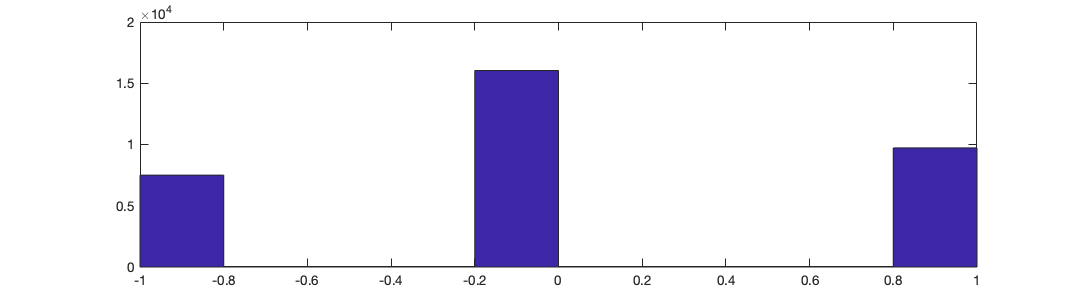

In [7]:
X6 = data_dense(:, 2:7);
y6 = data_dense(:, 9);
categorical_predictors = [];

In [18]:
n = size(X6,1);
m = floor(log2(n - 1));
maxNumSplits = 2.^(0:m-4);
minleaves = [1 10];
numTrees = 150;
Mdl6 = cell(numel(maxNumSplits),numel(minleaves));
for k = 1:numel(minleaves);
    for j = 1:numel(maxNumSplits);
        fprintf('fitting random forest for %d min leaves and %d max splits... \n', minleaves(k), maxNumSplits(j))
        t = templateTree('MaxNumSplits',maxNumSplits(j), 'minleaf', minleaves(k), 'Surrogate','on');
        Mdl6{j,k} = fitensemble(X6,y6,'bag',numTrees,t,'CategoricalPredictors', categorical_predictors,'Type','classification','KFold',5);
    end;
end;

fitting random forest for 1 min leaves and 1 max splits... 
fitting random forest for 1 min leaves and 2 max splits... 
fitting random forest for 1 min leaves and 4 max splits... 
fitting random forest for 1 min leaves and 8 max splits... 
fitting random forest for 1 min leaves and 16 max splits... 
fitting random forest for 1 min leaves and 32 max splits... 
fitting random forest for 1 min leaves and 64 max splits... 
fitting random forest for 1 min leaves and 128 max splits... 
fitting random forest for 1 min leaves and 256 max splits... 
fitting random forest for 1 min leaves and 512 max splits... 
fitting random forest for 1 min leaves and 1024 max splits... 
fitting random forest for 1 min leaves and 2048 max splits... 
fitting random forest for 10 min leaves and 1 max splits... 
fitting random forest for 10 min leaves and 2 max splits... 
fitting random forest for 10 min leaves and 4 max splits... 
fitting random forest for 10 min leaves and 8 max splits... 
fitting random forest

In [19]:
kflAll = @(x)kfoldLoss(x,'Mode','cumulative');
errorCell = cellfun(kflAll,Mdl6,'Uniform',false);
error6 = reshape(cell2mat(errorCell),[numTrees numel(maxNumSplits) numel(minleaves)]);


ans =

    12



In [20]:
[numTrees numel(maxNumSplits) numel(minleaves)]


ans =

   150    12     2




idxNumTrees =

   147


ans =

        2048


ans =

     1



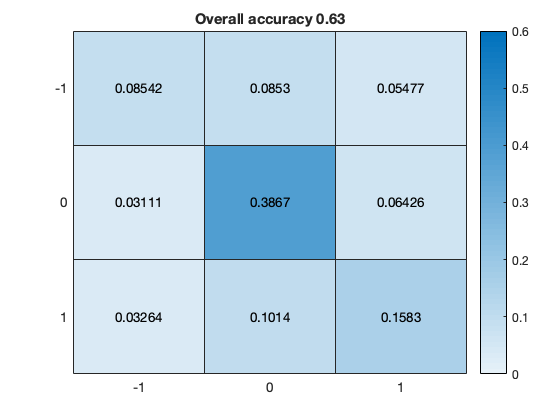

In [21]:
[minErr,minErrIdxLin] = min(error6(:));
[idxNumTrees,idxMNS,idxMinLeaf] = ind2sub(size(error6),minErrIdxLin);
idxNumTrees,maxNumSplits(idxMNS),minleaves(idxMinLeaf)

best6 = Mdl6(idxMNS, idxMinLeaf);
best6 = best6{1};
ypred6 = kfoldPredict(best6);
[C6, order] = confusionmat(best6.Y,ypred6);
h6 = heatmap(order, order, C6/sum(sum(C6)));
caxis([0, 0.6])
h6.Title = sprintf('Overall accuracy %0.2f', trace(C6/sum(sum(C6))));